<a href="https://colab.research.google.com/github/NoorFatimaMemon/GRIP-Iris-Decision-Tree-Prediction/blob/main/GRIP_Task_6_Iris_Decision_Tree_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduate Rotational Internship Program (GRIP)**
## **Data Science & Business Analytics Intern**
### Task 06: Create a Decision Tree classifier and represent it visually. (**By Noor Fatima Memon**)

#### **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Visualization libraries
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### **Data Loading**

In [3]:
columns = ["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)", "Class Labels"] #data in centimeters
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_of_iris_task.data', names = columns)
df

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  150 non-null    float64
 1   Sepal Width (cm)   150 non-null    float64
 2   Petal Length (cm)  150 non-null    float64
 3   Petal Width (cm)   150 non-null    float64
 4   Class Labels       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### **Analyze & visualize the dataset**

In [5]:
# Proof of concept (POC) for Iris data
# statistical analysis of the data
df.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


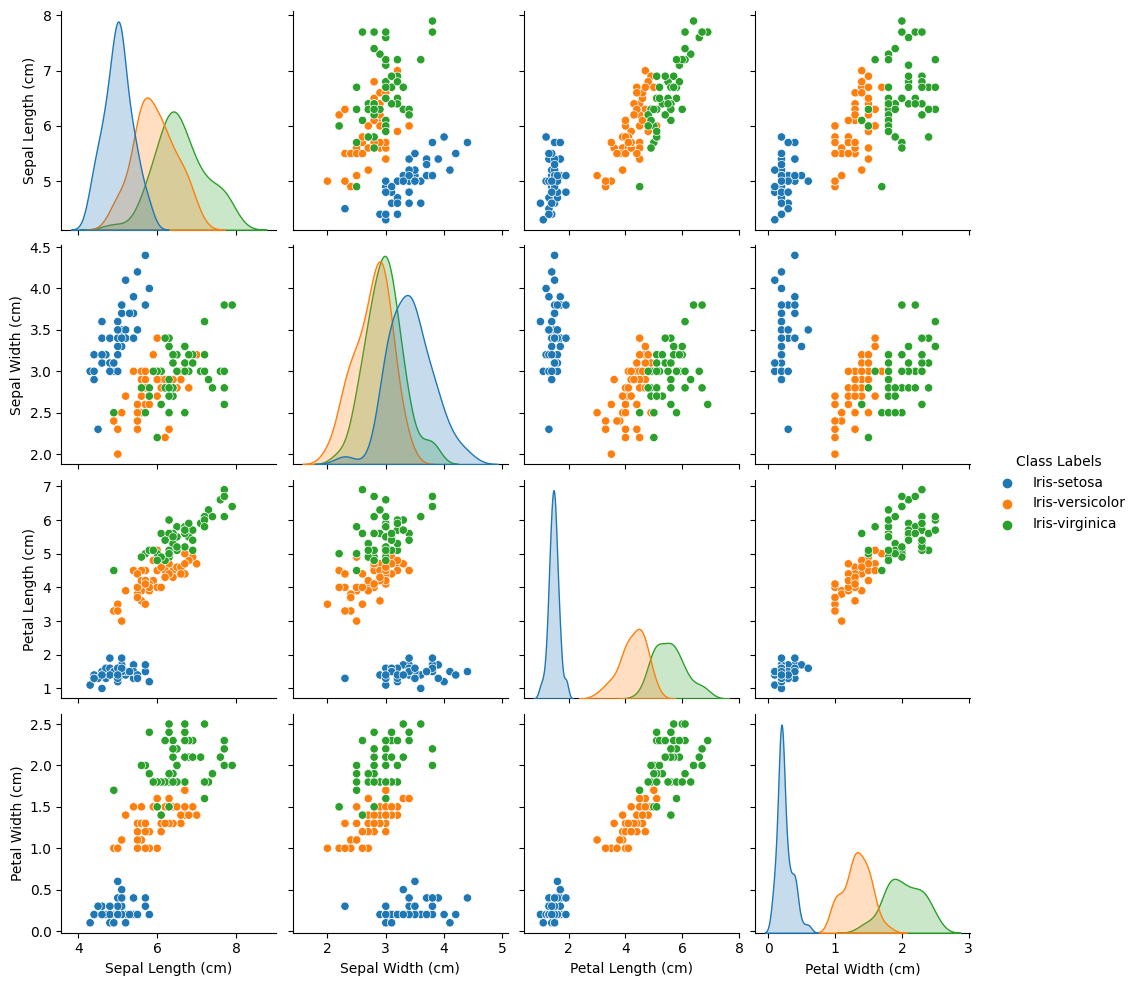

In [6]:
# POC for Visualization
# dataset Visualization
sns.pairplot(df, hue='Class Labels')

#### **Training the Model**

In [7]:
features = df[["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)"]]
types = df["Class Labels"]
x_train, x_test, y_train, y_test = train_test_split(features,types,test_size=0.30, random_state=0)

In [8]:
DTC = DecisionTreeClassifier()                          #Creating an instance of Decision Tree Classifier
DTC.fit(x_train, y_train)                    # Fitting the model to the training data

DecisionTreeClassifier()

#### **Visualizing Decision Tree using graphviz library**

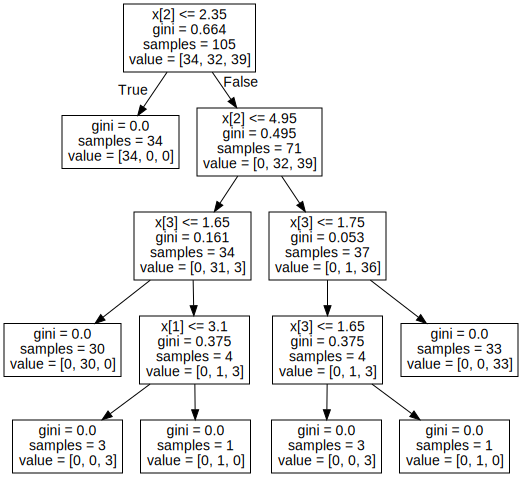

In [9]:
dot_data = tree.export_graphviz(DTC, out_file=None)
graph = graphviz.Source(dot_data)
graph

#### **Evaluation of the Model**

In [10]:
#Predicting from the test dataset
predictions = DTC.predict(x_test)    #to predict the labels for the test dataset, and are stored in the predictions variable

#Calculating the accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy*100

print(accuracy)
print(classification_report(y_test, predictions))

97.77777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



#### **Testing of the Model**

In [11]:
x_new = np.array([[7, 2, 6.5, 0.2], [2.9, 2.2, 1.8, 1.5], [6.3, 2.5, 4.6, 1.9]])

# Prediction of the species from the input vector
prediction = DTC.predict(x_new)
print("Prediction of the Species: {}".format(prediction))

Prediction of the Species: ['Iris-virginica' 'Iris-setosa' 'Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
